# `20201108a` -- Experimenting with v0.2.6 of the lib 

#### Changes :

* Saving NDT acquisitions as in `fpga.stdNDTacq()`
* Processing those in `plot.readfile("20201107155232.npz")`

In [8]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import datetime
USB.__version__

'0.2.6'

In [40]:
# init FTDI device
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6)
# reload configuration (optional step - just to fill BRAM (DACGAIN registers) with initial values)
fpga.reload()
# reset fpga
fpga.reset()

In [45]:
gain = [int(300 + ((400-300)*x*x*x/32/32/32)) for x in range(32)]
gain[0] = 0
fpga.do_acquisition(acq_lines=32, gain=gain, double_rate=True) 
now = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
print(now)
file = fpga.save(nameFile = str(now)+"_ndt")

20201108171137


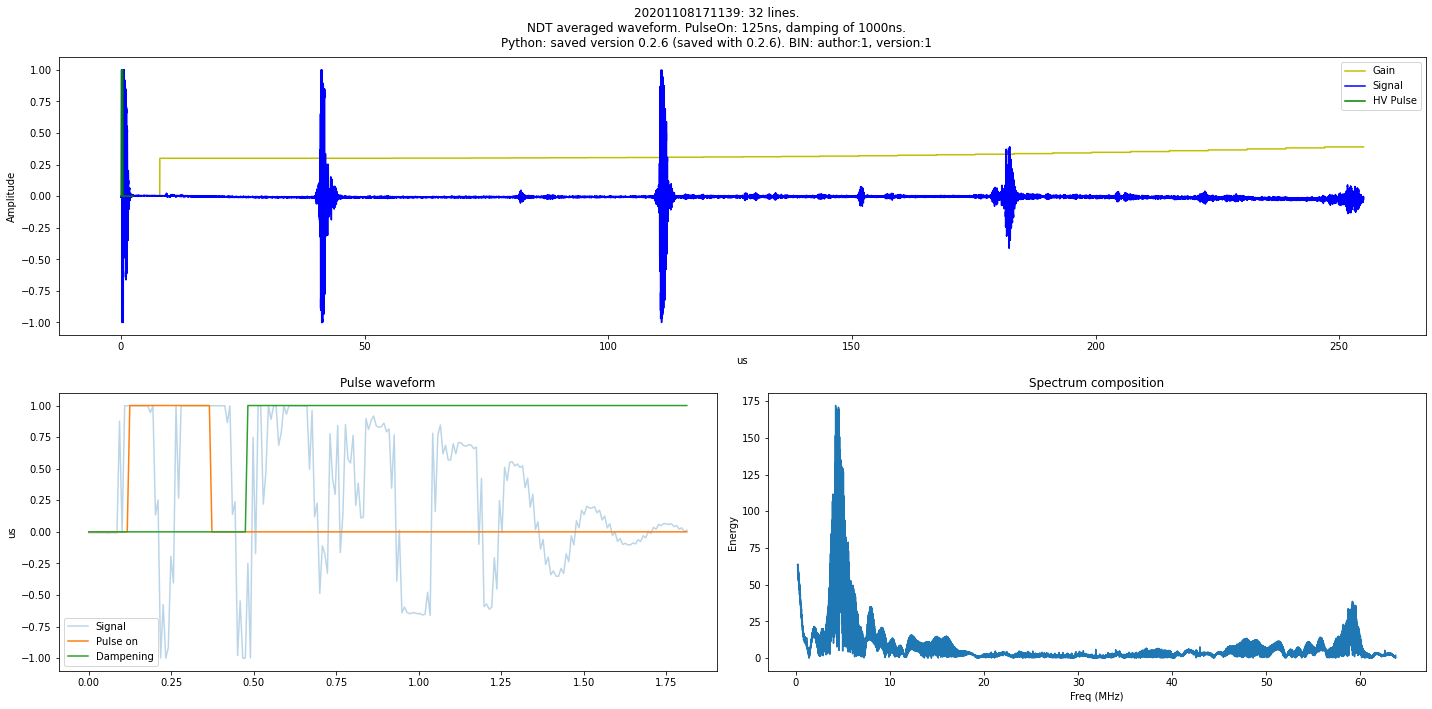

In [46]:
plot = USB.FView()
data = plot.readfile(file)

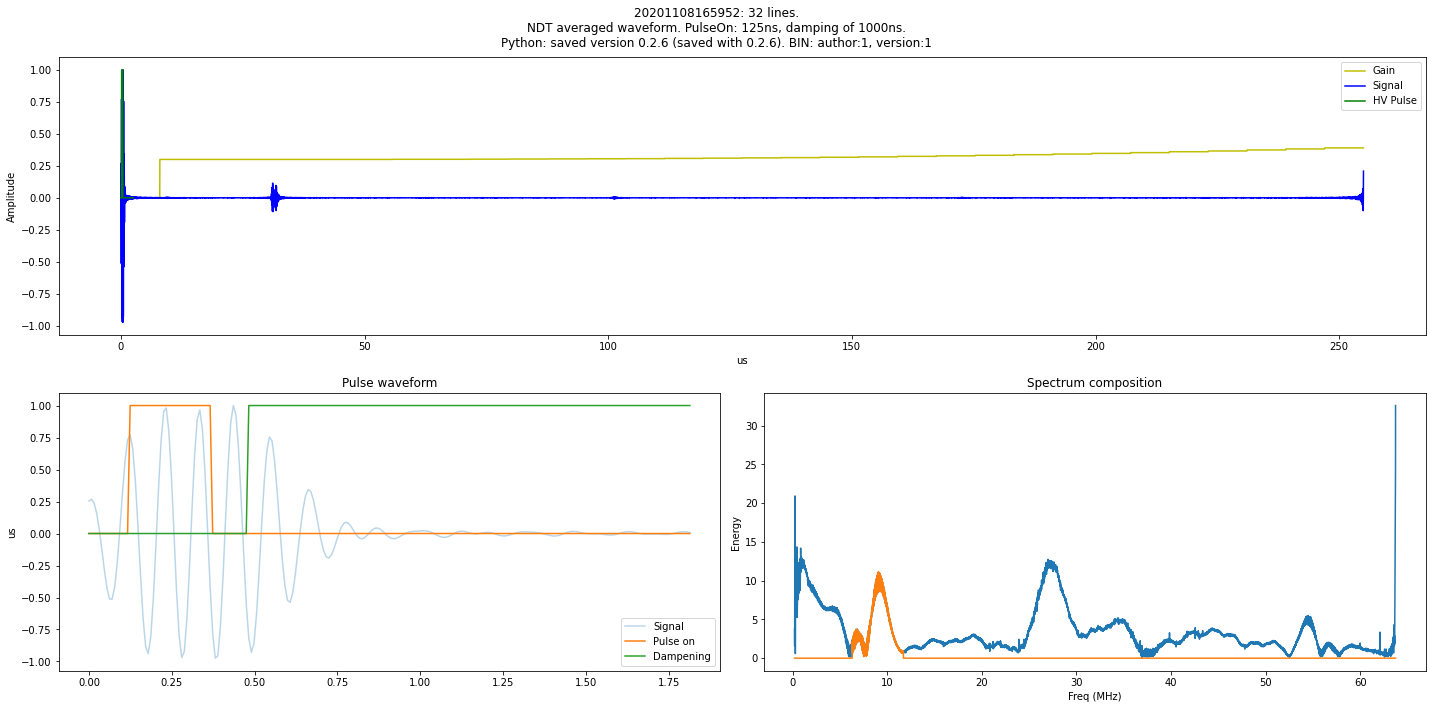

In [36]:
plot.plotNDT(data,fCentral=9.0,bandwidth=0.6)